# NYC flight delay analysis
An analysis of NYC flight delay data

In [1]:
%matplotlib inline
import pandas as pd

In [2]:
flights = pd.read_csv("flights.csv")

In [3]:
flights

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,2013-01-01 05:00:00
6,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,507,N516JB,EWR,FLL,158.0,1065,6,0,2013-01-01 06:00:00
7,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,5708,N829AS,LGA,IAD,53.0,229,6,0,2013-01-01 06:00:00
8,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,79,N593JB,JFK,MCO,140.0,944,6,0,2013-01-01 06:00:00
9,2013,1,1,558.0,600,-2.0,753.0,745,8.0,AA,301,N3ALAA,LGA,ORD,138.0,733,6,0,2013-01-01 06:00:00


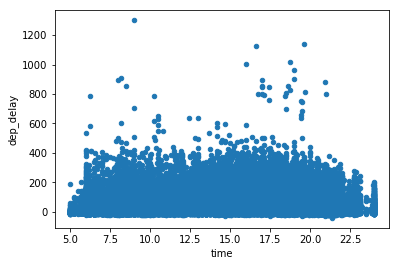

In [6]:
flights["time"] = flights["hour"] + flights["minute"]/60.
flights.plot(x="time", y="dep_delay",kind = "scatter")

In [23]:
worst_carriers = flights[["dep_delay", "carrier"]].groupby("carrier").mean().sort_values("dep_delay", ascending=False).head(5)
worst_carriers.reset_index(inplace=True)

In [24]:
carriers=pd.read_csv("airlines.csv")

In [25]:
carriers

,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.
3,B6,JetBlue Airways
4,DL,Delta Air Lines Inc.
5,EV,ExpressJet Airlines Inc.
6,F9,Frontier Airlines Inc.
7,FL,AirTran Airways Corporation
8,HA,Hawaiian Airlines Inc.
9,MQ,Envoy Air


In [26]:
worst_carriers = pd.merge(worst_carriers, carriers, how="left")

In [27]:
worst_carriers

,carrier,dep_delay,name
0,F9,20.215543,Frontier Airlines Inc.
1,EV,19.955390,ExpressJet Airlines Inc.
2,YV,18.996330,Mesa Airlines Inc.
3,FL,18.726075,AirTran Airways Corporation
4,WN,17.711744,Southwest Airlines Co.


These are the worst airlines for average delay.